# Big Mac Index - Visualization 
![](https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1500w,f_auto,q_auto:best/newscms/2016_16/1506611/big_mac_sm.jpg)

#### Hello Kaggler, This time, I prepare Big Mac Index Visualization
#### Do you know Big Mac Index?
#### It's very famous in Finance
#### Becuase, Big Mac prices are similar in all McDonald's stores, made with similar ingredients and recipes.
#### So, you can compare world's value of money using Big Mac Index
#### Then, Just enjoy my work plz. (I like Big Mac most in Mcdonald)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='../input/acmeregular/Acme-Regular.ttf')

data = pd.read_csv("../input/the-big-mac-economic-index/big-mac-adjusted-index.csv")
data = data.drop(['USD', 'EUR', 'GBP','JPY','CNY'],axis=1)
data['date'] = data['date'].apply(lambda x : x.split("-")[0])
data = data.groupby(['date','iso_a3','name'])[['local_price','dollar_price','GDP_dollar']].mean().reset_index()
data['date'] = pd.to_numeric(data['date'])
data.head(5)

,date,iso_a3,name,local_price,dollar_price,GDP_dollar
0,2011,ARG,Argentina,20.00,4.839685,9138.177
1,2011,AUS,Australia,4.56,4.943724,55589.549
2,2011,BRA,Brazil,9.50,6.162429,10816.487
3,2011,CAN,Canada,4.73,5.000793,46214.914
4,2011,CHE,Switzerland,6.50,8.063016,67245.997


#### I used only, countries'name, local price, dollar_price, and GDP(per Capita).
#### Please think that I am not an economist, but an ordinary student.

# 1. The global average price of Big Mac

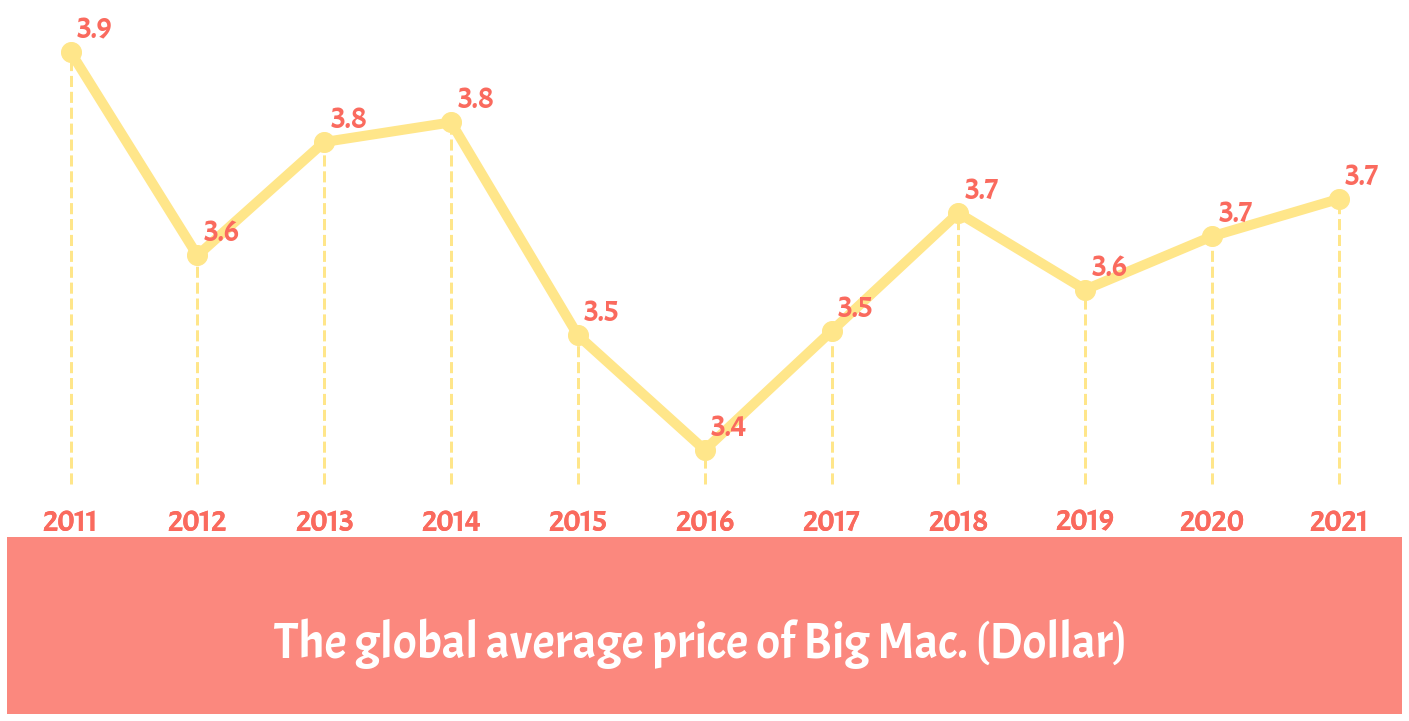

In [2]:
price_history = dict(data.groupby('date')['dollar_price'].mean())

fig, ax = plt.subplots(figsize=(25,13),facecolor="white")
plt.plot(price_history.keys(), price_history.values(), lw=10, color='#FFE68A')
plt.scatter(x = price_history.keys(), y = price_history.values(), s=400, color = '#FFE68A')
ax.axhspan(ymin = 3.0,ymax= 3.25, fc='#FA6A5E', alpha=0.8)
ax.text(s="The global average price of Big Mac. (Dollar) ",x=2016,y=3.1, font=font, fontsize=50, color='white',va='center', ha='center')
ax.axis('off')
ax.set_ylim(3.,4)

for_text = price_history.items()
for year, value in for_text:
    plt.text(s=f"{round(value,1)}", x=year+0.05, y=value+0.02, font = font, color ='#FA6A5E', fontsize=30)
    plt.text(s=year, x=year, y=3.25, font = font, color ='#FA6A5E', fontsize=30, va='bottom', ha='center')
    plt.text(s=year, x=year, y=3.25, font = font, color ='#FA6A5E', fontsize=30, va='bottom', ha='center')
    plt.axvline(x=year,ymin=1.3/4, ymax=(value-3), color='#FFE68A', linestyle='--', linewidth=3)

plt.show()


#### I tried to create a McDonald's atmosphere in my visualization.
#### The global average price of Big Mac take range 3.4 ~ 3.9 dollar
#### I was surprised that the price of the Big Mac was lowered in 2014 ~ 2016
#### In Korea, Big Mac's local price always increase.
#### So, this chart is interested

# 2. Is Big Mac's price and GDP related?

In [3]:
data_2021 =  data[data['date']==2021]
data_2021['group'] = data_2021['GDP_dollar'].apply(lambda x: int(x//10000))
average = data_2021.groupby('group').mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


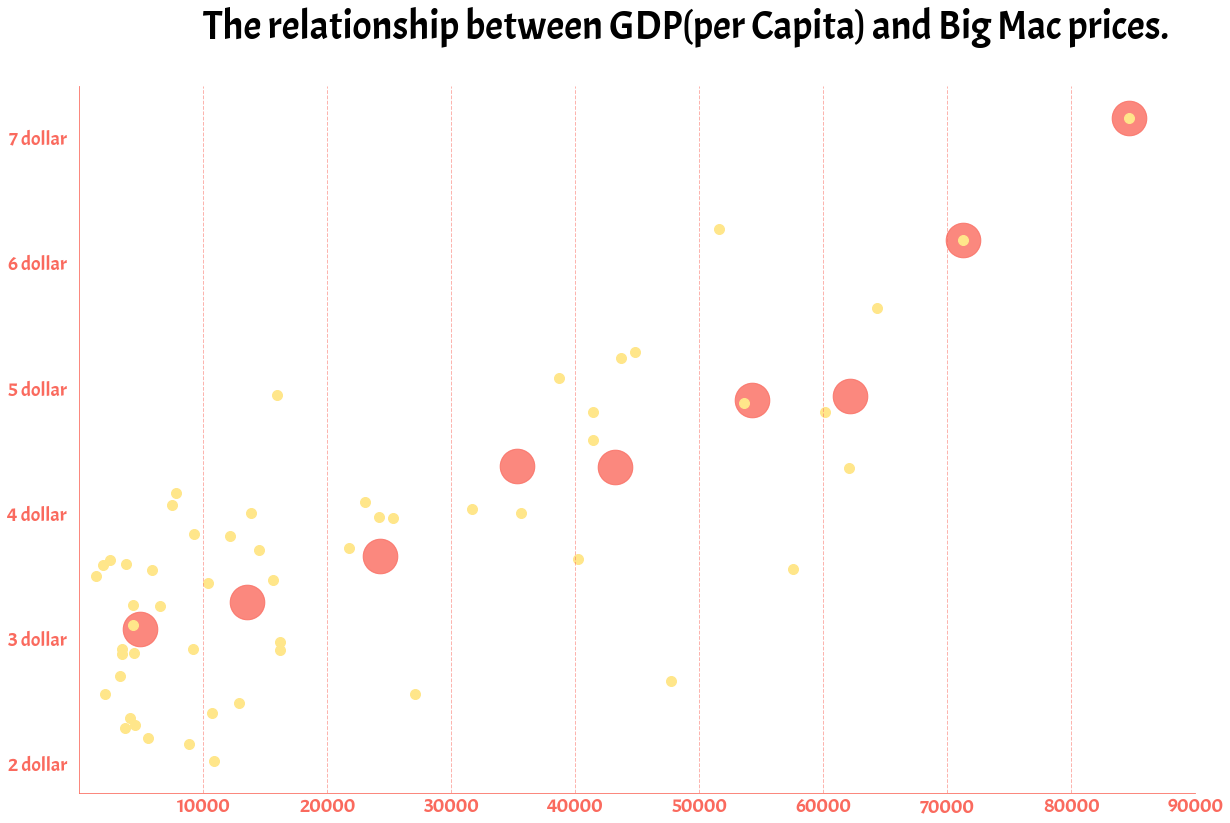

In [4]:
fig, ax = plt.subplots(figsize=(20,13),facecolor="white")
plt.scatter(x = average['GDP_dollar'], y = average['dollar_price'], s=1200,alpha=0.8, color='#FA6A5E')
plt.scatter(x = data_2021['GDP_dollar'], y = data_2021['dollar_price'],s=100, color= '#FFE68A')

for i in range(9):
    ax.axvline(x= (i+1)*10000, color='#FA6A5E', linestyle='--', linewidth=1, alpha=0.5)
    ax.text(s=f"{(i+1)*10000}", x=(i+1)*10000, y=1.75,color='#FA6A5E',ha='center', va='top',fontsize=20, font=font)
    
for i in range(2,8):
#     ax.axhline(y=i, color='#FA6A5E', linestyle='--', linewidth=1)
    ax.text(s=f"{i} dollar", x=-1000, y=i,color='#FA6A5E',ha='right', va='center',fontsize=20, font=font)
    
ax.set_xlim(0,90000)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_color('#FA6A5E')
ax.spines['left'].set_color('#FA6A5E')

ax.set_xticks([])
ax.set_yticks([])

plt.text(s="The relationship between GDP(per Capita) and Big Mac prices.", x= 10000, y=7.8, font=font, fontsize=40)

plt.show()

#### I made a group in units of 10000 and averaged it.
#### The red circles is that.
#### Look widely, you can feel it has linear relation betweeen GDP(per Capita) and Big Mac price.

# 3. So, which country is the most expensive and which country is the cheapest?


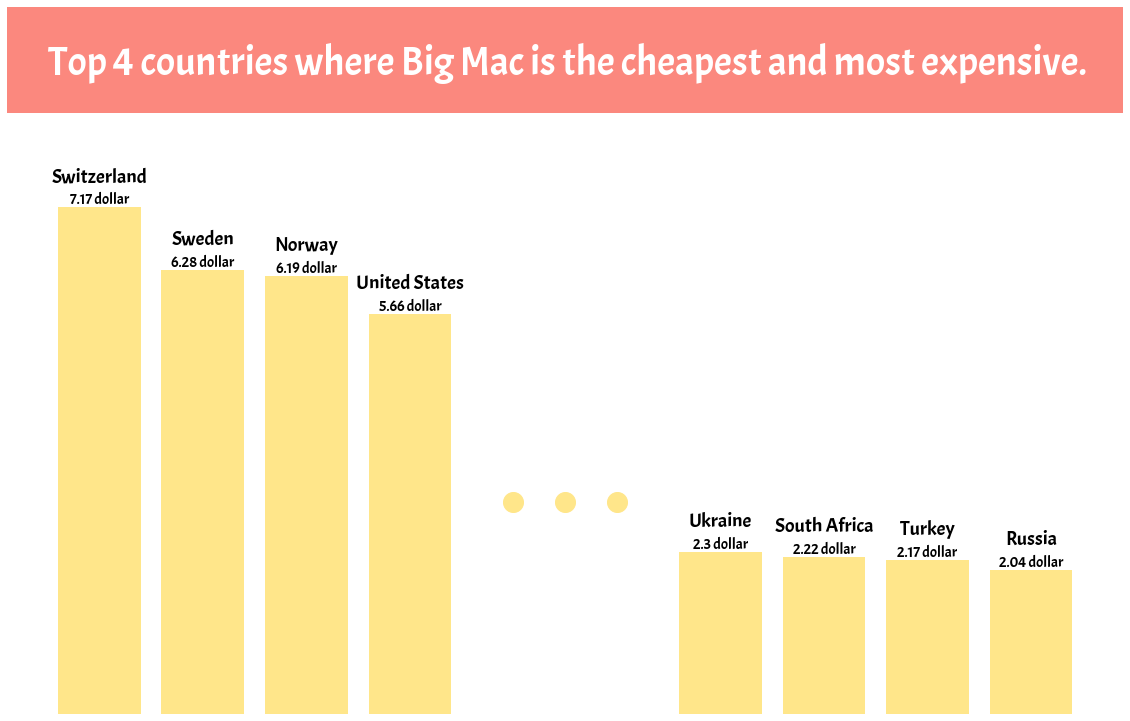

In [5]:
sort_price = data_2021.sort_values(by='dollar_price')
high = sort_price.tail(4)
low = sort_price.head(4)

fig, ax = plt.subplots(figsize=(20,13),facecolor="white")

plt.bar(x=[*range(10,6,-1)], height = low['dollar_price'],color='#FFE68A')
plt.scatter([5,5.5,6], y=[3]*3, s= 400,color='#FFE68A')
plt.bar(x=[*range(4,0, -1)], height = high['dollar_price'],color='#FFE68A')

for i, value in enumerate(zip(high['dollar_price'], high['name'])):
    plt.text(s=f"{round(value[0],2)} dollar", x=(4-i), y=value[0], va='bottom', ha='center', font=font, fontsize=15)
    plt.text(s=f"{value[1]}", x=(4-i), y=value[0]+0.3, va='bottom', ha='center', font=font, fontsize=20)

for i, value in enumerate(zip(low['dollar_price'], low['name'])):
    plt.text(s=f"{round(value[0],2)} dollar", x=(10-i), y=value[0], va='bottom', ha='center', font=font, fontsize=15)
    plt.text(s=f"{value[1]}", x=(10-i), y=value[0]+0.3, va='bottom', ha='center', font=font, fontsize=20)

ax.axhspan(ymin = 8.5,ymax= 10, fc='#FA6A5E', alpha=0.8)
ax.text(s="Top 4 countries where Big Mac is the cheapest and most expensive.",x=0.5,y=9.2, font=font, fontsize=40, color='white',va='center', ha='left')
    
plt.axis("off")

plt.ylim(0,10)
plt.show()

#### Switzerland is the most expensive country. and followed by Sweden, Norway, United States
#### The most chpeast country is Russia, and followed Turkey, South Africa, Ukraine.

#### I was surprised that there was such a big price difference.

In [6]:
swit = data[data['name'] =='Switzerland']
swit['ad_loc'] = swit['local_price'].apply(lambda x: x/6.5)
swit['ad_dol'] = swit['dollar_price'].apply(lambda x: x/8.063016)

rus = data[data['name'] =='Russia']
rus['ad_loc'] = rus['local_price'].apply(lambda x: x/75)
rus['ad_dol'] = rus['dollar_price'].apply(lambda x: x/2.702459)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# 4. History of Big Mac price in Switzerland, Russia

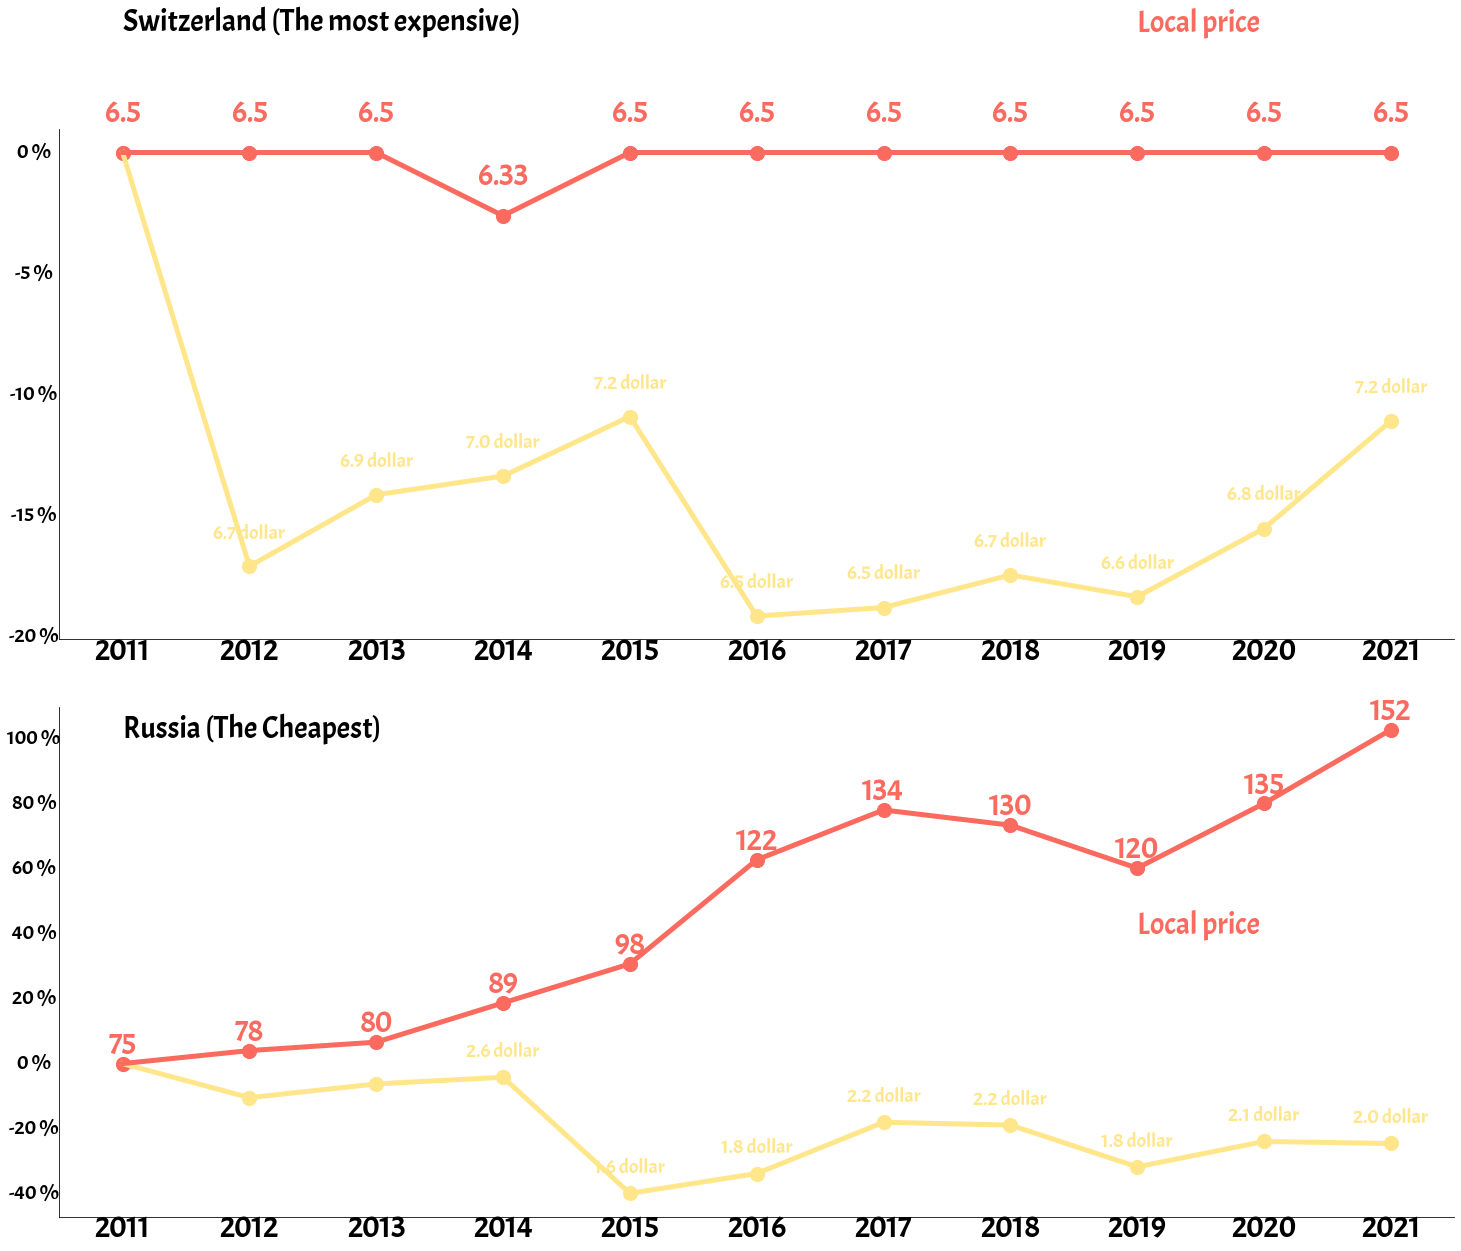

In [7]:
fig, ax = plt.subplots(figsize=(25,20),facecolor="white")
spec = gridspec.GridSpec(ncols=1, nrows=19, figure=fig)

spec = gridspec.GridSpec(ncols=1, nrows=19, figure=fig)
ax1 = fig.add_subplot(spec[:9, 0])
ax2 = fig.add_subplot(spec[10:, 0])

ax1.plot(swit['date'], swit['ad_dol'], lw=5, color='#FFE68A')
ax1.scatter(swit['date'], swit['ad_dol'], s=200, color='#FFE68A')
ax1.plot(swit['date'], swit['ad_loc'], lw=5, color='#FA6A5E')
ax1.scatter(swit['date'], swit['ad_loc'], s=200, color='#FA6A5E')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_xticks([])
ax1.set_yticks([])

for i in swit['date']:
    ax1.text(s=i, x=i, y=0.8, font=font,fontsize=30, va='top', ha='center')
    ax2.text(s=i, x=i, y=0.54, font=font,fontsize=30, va='top', ha='center')

for i, value in enumerate(zip(swit['date'], swit['local_price'], swit['ad_loc'])):
    ax1.text(s=f"{value[1]}", x=value[0], y=value[2]+0.01, font=font, fontsize=30, va='bottom', ha='center', color='#FA6A5E')

for i, value in enumerate(zip(swit['date'], swit['dollar_price'], swit['ad_dol'])):
    if i==0:
        continue
    ax1.text(s=f"{round(value[1],1)} dollar", x=value[0], y=value[2]+0.01, font=font, fontsize=20, va='bottom', ha='center', color='#FFE68A')

for i in range(-4,1):
    ax1.text(s=f"{round((i*0.05)*100)} %", x=2010.3, y=1+i*0.05, font=font, fontsize=20, va='center',ha='center')
    
ax2.plot(rus['date'], rus['ad_dol'], lw=5, color='#FFE68A')
ax2.scatter(rus['date'], rus['ad_dol'], s=200, color='#FFE68A')
ax2.plot(rus['date'], rus['ad_loc'], lw=5, color='#FA6A5E')
ax2.scatter(rus['date'], rus['ad_loc'], s=200, color='#FA6A5E')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for i in range(-2,6):
    ax2.text(s=f"{round((i*0.2)*100)} %", x=2010.3, y=1+i*0.2, font=font, fontsize=20, va='center',ha='center')
    
for i, value in enumerate(zip(rus['date'], rus['local_price'], rus['ad_loc'])):
    ax2.text(s=f"{round(value[1])}", x=value[0], y=value[2]+0.01, font=font, fontsize=30, va='bottom', ha='center', color='#FA6A5E')

for i, value in enumerate(zip(rus['date'], rus['dollar_price'], rus['ad_dol'])):
    if i<3:
        continue
    ax2.text(s=f"{round(value[1],1)} dollar", x=value[0], y=value[2]+0.05, font=font, fontsize=20, va='bottom', ha='center', color='#FFE68A')

ax2.set_xticks([])
ax2.set_yticks([])

ax1.text(s="Switzerland (The most expensive)", x=2011, y= 1.05,font=font, fontsize=30)
ax1.text(s="Local price", x=2019, y= 1.05,font=font, fontsize=30, color='#FA6A5E')

ax2.text(s="Russia (The Cheapest)", x=2011, y= 2,font=font, fontsize=30)
ax2.text(s="Local price", x=2019, y= 1.4,font=font, fontsize=30, color='#FA6A5E')

ax.axis('off')
plt.show()

#### The two charts show different patterns.
#### First, In Switzerland. The local price is almost same. But the dollar price was chaged. 
#### Next, In Russia, The local price increased steadily. But the dollar price was decreased.
#### This seems to be the reason why the Big Mac Index is used in the economy.
#### If you have other insight, Feel free to give some comments ! 
#### Thanks for watching my work.